## Predicting Credit Card Approval

# Introduction:

In the contemporary financial landscape, the credit card department relies on advanced data science tools to assess creditworthiness. This project explores the intricate factors shaping credit card approval, emphasizing the pivotal role of data-driven decisions in banking.

# Purpose:

This project aims to unravel the complexities influencing credit card approval/rejection. Analyzing diverse features like gender, income, and employment status, we seek to enhance credit risk assessment insights. The objective is to contribute valuable knowledge to the banking sector and showcase machine learning's role in predictive credit card approval.

# About Dataset:
Features name: (Credit_Card.csv)

Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size


Another data set (Credit_card_label.csv) contains two key pieces of information

ID: The joining key between application data and credit status data, same is Ind_ID

Label: 0 is application approved and 1 is application rejected.

# Importing necessary libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder



In [ ]:
# Loading data
credit_card_data = pd.read_csv('/content/Credit_card.csv')
credit_card_label = pd.read_csv('/content/Credit_card_label.csv')


# Data Preprocessing:

In [ ]:
credit_card_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2


In [ ]:
credit_card_label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [ ]:
# Merging dataframes on 'ID'
merged_data = pd.merge(credit_card_data, credit_card_label, on='Ind_ID')

In [ ]:
merged_data.describe(include="all")


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499,0.113049
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772,0.316755
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,0.000000


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
#Checking Null values

merged_data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
#Dealing with missing values
#Dropping NA from Gender and  Annual_income

# Specify columns with missing values to drop
columns_to_drop_na = ['Gender', 'Annual_income']

# Drop rows with missing values in the specified columns
merged_data = merged_data.dropna(subset=columns_to_drop_na)

# checking NULL
merged_data.isnull().sum()


Ind_ID               0
Gender               0
Car_Owner            0
Property_Owner       0
Children             0
Annual_income        0
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days      256
Mobile_phone         0
Work_Phone           0
Phone                0
Emial-ID             0
Type_Occupation    478
Family_Members       0
label                0
Birthday_date       22
Employed_date      256
dtype: int64

In [ ]:
# Changing some columns names as are written in capital letters
# Rename specific columns
new_column_names = {
    'GENDER': 'Gender',
    'CHILDREN': 'Children',
    'EDUCATION': 'Education',
    'EMAIL_ID': 'Emial-ID',
    'Propert_Owner': 'Property_Owner'
}

merged_data.rename(columns=new_column_names, inplace=True)

In [ ]:
print(merged_data.columns)

Index(['Ind_ID', 'Gender', 'Car_Owner', 'Property_Owner', 'Children',
       'Annual_income', 'Type_Income', 'Education', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'Emial-ID', 'Type_Occupation', 'Family_Members',
       'label', 'Birthday_date', 'Employed_date'],
      dtype='object')


In [ ]:
#Checking for unique values
for x in merged_data.columns:
  print(x,':',len(merged_data[x].unique()))
print(merged_data.shape)

Ind_ID : 1518
Gender : 2
Car_Owner : 2
Property_Owner : 2
Children : 6
Annual_income : 115
Type_Income : 4
Education : 5
Marital_status : 5
Housing_type : 6
Birthday_count : 1252
Employed_days : 943
Mobile_phone : 1
Work_Phone : 2
Phone : 2
Emial-ID : 2
Type_Occupation : 19
Family_Members : 7
label : 2
Birthday_date : 1252
Employed_date : 943
(1518, 21)


In [ ]:
print(merged_data["Employed_date"].value_counts())

18    478
8     266
3     171
10    132
14    120
4      85
6      63
11     50
0      43
16     24
1      20
2      19
12     17
15      9
9       9
17      5
5       3
7       2
13      2
Name: Type_Occupation, dtype: int64


In [ ]:

# Select categorical columns
categorical_columns = merged_data.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to columns with a large number of unique values
columns_to_label_encode = ['Type_Occupation','Type_Income','Education','Marital_status','Housing_type']  # Add other columns as needed
for column in columns_to_label_encode:
    merged_data[column] = label_encoder.fit_transform(merged_data[column])


# Display the first few rows of the encoded DataFrame
merged_data.head()

,Ind_ID,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,Emial-ID,Type_Occupation,Family_Members,label,Birthday_date,Employed_date
0,5008827,0,1,1,0,180000.0,1,1,1,1,...,NaT,1,0,0,0,18,2,1,1972-07-30 11:34:22.136693,NaT
1,5009744,1,1,0,0,315000.0,0,1,1,1,...,-586 days,1,1,1,0,18,2,1,1986-11-09 11:34:22.136693,2022-05-15 11:34:22.160746
2,5009746,1,1,0,0,315000.0,0,1,1,1,...,-586 days,1,1,1,0,18,2,1,NaT,2022-05-15 11:34:22.160746
4,5009752,1,1,0,0,315000.0,0,1,1,1,...,-586 days,1,1,1,0,18,2,1,1986-11-09 11:34:22.136693,2022-05-15 11:34:22.160746
6,5009754,1,1,0,0,315000.0,0,1,1,1,...,-586 days,1,1,1,0,18,2,1,1986-11-09 11:34:22.136693,2022-05-15 11:34:22.160746
7,5009894,1,0,0,0,180000.0,1,4,1,1,...,NaT,1,0,0,0,18,2,1,1963-05-17 11:34:22.136693,NaT
8,5010864,0,1,1,1,450000.0,0,4,1,1,...,-678 days,1,0,1,1,3,3,1,1974-03-21 11:34:22.136693,2022-02-12 11:34:22.160746
9,5010868,0,1,1,1,450000.0,1,4,1,1,...,-678 days,1,0,1,1,3,3,1,1974-03-21 11:34:22.136693,2022-02-12 11:34:22.160746
10,5010869,0,1,1,1,450000.0,0,4,3,1,...,-678 days,1,0,1,1,3,1,1,1974-03-21 11:34:22.136693,2022-02-12 11:34:22.160746
11,5018498,1,1,1,0,90000.0,3,4,1,1,...,-1002 days,1,1,1,0,2,2,1,1972-02-03 11:34:22.136693,2021-03-25 11:34:22.160746


In [ ]:


# Columns to convert: 'Car_Owner' and 'Property_Owner'
columns_to_convert = ['Car_Owner', 'Property_Owner']

# Map 'Y' to 1 and 'N' to 0 for specified columns
merged_data[columns_to_convert] = merged_data[columns_to_convert].replace({'Y': 1, 'N': 0})




<ipython-input-31-3e29428f8520>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[columns_to_convert] = merged_data[columns_to_convert].replace({'Y': 1, 'N': 0})


In [ ]:

# Specify column to convert: 'Gender'
column_to_convert = 'Gender'

# Create a copy of the DataFrame
merged_data = merged_data.copy()

# Map 'F' to 1 and 'M' to 0 for the specified column in the copied DataFrame
merged_data.loc[:, column_to_convert] = merged_data_copy[column_to_convert].replace({'F': 1, 'M': 0})

In [ ]:
# Convert the 'Gender' column from float to int
merged_data[column_to_convert] = merged_data[column_to_convert].astype(int)

<ipython-input-29-1726e0f8c2ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data[column_to_convert] = merged_data[column_to_convert].astype(int)


In [ ]:
# Specify the columns to be removed
columns_to_remove = ['Birthday_count', 'Employed_days']

# Drop the specified columns from the DataFrame
merged_data = merged_data.drop(columns=columns_to_remove)

In [ ]:
merged_data.head()

,Ind_ID,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Emial-ID,Type_Occupation,Family_Members,label,Birthday_date,Employed_date
0,5008827,0,1,1,0,180000.0,1,1,1,1,1,0,0,0,18,2,1,1972-07-30 11:34:22.136693,NaT
1,5009744,1,1,0,0,315000.0,0,1,1,1,1,1,1,0,18,2,1,1986-11-09 11:34:22.136693,2022-05-15 11:34:22.160746
2,5009746,1,1,0,0,315000.0,0,1,1,1,1,1,1,0,18,2,1,NaT,2022-05-15 11:34:22.160746
4,5009752,1,1,0,0,315000.0,0,1,1,1,1,1,1,0,18,2,1,1986-11-09 11:34:22.136693,2022-05-15 11:34:22.160746
6,5009754,1,1,0,0,315000.0,0,1,1,1,1,1,1,0,18,2,1,1986-11-09 11:34:22.136693,2022-05-15 11:34:22.160746


# Visualization

In [ ]:
#perfom correlation matrix Using pandas
corr = merged_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-85-f697a9c38a49>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_data.corr()
<ipython-input-85-f697a9c38a49>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Ind_ID,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Emial-ID,Type_Occupation,Family_Members,label
Ind_ID,1.00,-0.02,-0.05,-0.05,0.03,0.03,0.03,0.02,0.02,0.03,nan,0.09,0.01,-0.05,-0.03,0.01,0.02
Gender,-0.02,1.00,-0.37,0.04,-0.06,-0.22,-0.06,0.04,0.13,-0.08,nan,-0.04,0.03,0.03,0.13,-0.10,-0.05
Car_Owner,-0.05,-0.37,1.00,0.01,0.06,0.21,0.03,-0.12,-0.14,-0.00,nan,0.02,0.02,0.03,-0.12,0.12,-0.02
Property_Owner,-0.05,0.04,0.01,1.00,-0.00,0.05,-0.06,-0.03,0.00,-0.18,nan,-0.17,-0.08,0.07,0.04,-0.00,-0.02
Children,0.03,-0.06,0.06,-0.00,1.00,0.08,0.06,-0.07,-0.16,0.00,nan,0.03,-0.01,0.02,-0.13,0.89,-0.02
Annual_income,0.03,-0.22,0.21,0.05,0.08,1.00,-0.14,-0.24,0.00,0.01,nan,-0.07,-0.01,0.12,-0.09,0.05,0.02
Type_Income,0.03,-0.06,0.03,-0.06,0.06,-0.14,1.00,0.09,-0.04,0.03,nan,0.15,0.02,-0.04,-0.24,0.07,-0.06
Education,0.02,0.04,-0.12,-0.03,-0.07,-0.24,0.09,1.00,0.05,-0.04,nan,-0.01,-0.02,-0.12,0.05,-0.07,-0.02
Marital_status,0.02,0.13,-0.14,0.00,-0.16,0.00,-0.04,0.05,1.00,-0.01,nan,-0.08,0.00,-0.06,0.10,-0.54,0.06
Housing_type,0.03,-0.08,-0.00,-0.18,0.00,0.01,0.03,-0.04,-0.01,1.00,nan,0.04,-0.04,0.02,-0.06,0.00,0.00


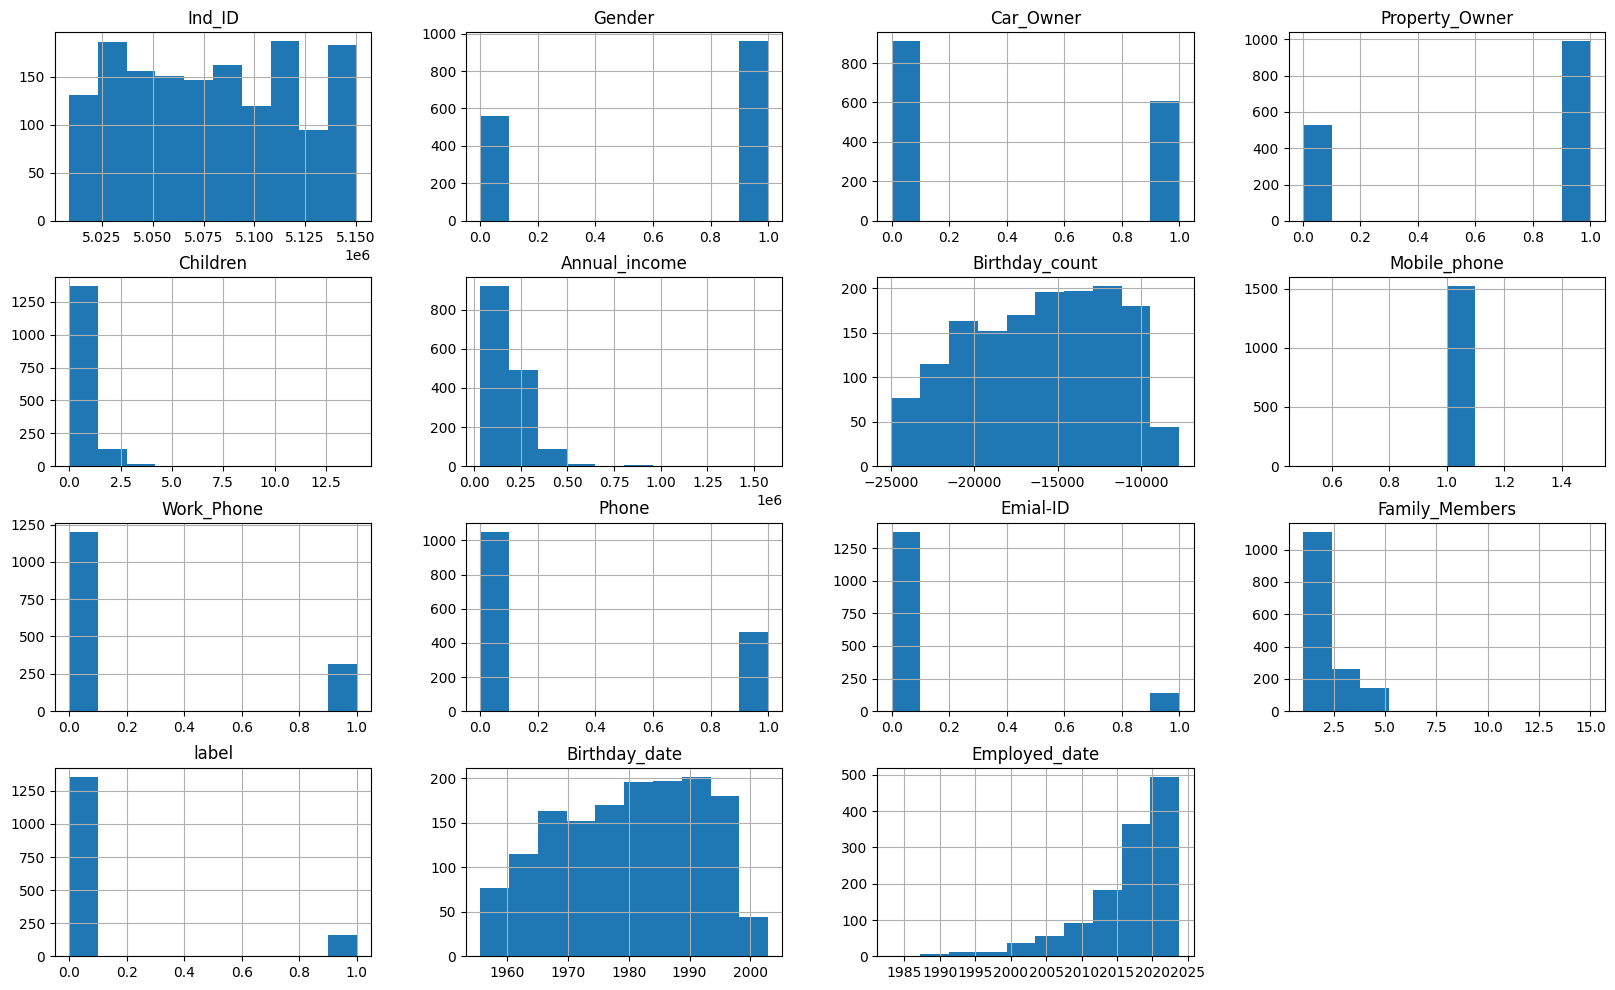

In [ ]:
merged_data.hist(figsize=(20,12))
plt.show()

# MODEL CREATION

In [ ]:
# Convert datetime columns to numeric
X_train['Birthday_date'] = X_train['Birthday_date'].astype(int)
X_train['Employed_date'] = X_train['Employed_date'].astype(int)

X_test['Birthday_date'] = X_test['Birthday_date'].astype(int)
X_test['Employed_date'] = X_test['Employed_date'].astype(int)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    merged_data[['Ind_ID', 'Gender', 'Car_Owner', 'Property_Owner', 'Children',
       'Annual_income', 'Type_Income', 'Education', 'Marital_status',
       'Housing_type', 'Mobile_phone',
       'Work_Phone', 'Phone', 'Emial-ID', 'Type_Occupation', 'Family_Members',
        'Birthday_date', 'Employed_date']],
    merged_data['label'],
    test_size=0.2,
    random_state=42
)

# Convert datetime columns to numeric
X_train['Birthday_date'] = X_train['Birthday_date'].astype(int) // 10**9  # Convert nanoseconds to seconds
X_train['Employed_date'] = X_train['Employed_date'].astype(int) // 10**9

X_test['Birthday_date'] = X_test['Birthday_date'].astype(int) // 10**9
X_test['Employed_date'] = X_test['Employed_date'].astype(int) // 10**9


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [ ]:

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'classification_report': classification_rep
    }

# Compare models
for name, result in results.items():
    print(f'\nModel: {name}')
    print(f'Model Accuracy: {result["accuracy"]:.2f}')
    print('\nClassification Report:')
    print(result['classification_report'])


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Model: Logistic Regression
Model Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       276
           1       0.00      0.00      0.00        28

    accuracy                           0.91       304
   macro avg       0.45      0.50      0.48       304
weighted avg       0.82      0.91      0.86       304


Model: Decision Tree
Model Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       276
           1       0.40      0.61      0.48        28

    accuracy                           0.88       304
   macro avg       0.68      0.76      0.70       304
weighted avg       0.91      0.88      0.89       304


Model: Random Forest
Model Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       276
           1       0.74      0

# Summary:
Random Forest achieved the highest overall accuracy and balanced performance for both classes.
Decision Tree had issues correctly identifying class 1.
Logistic Regression struggled to predict class 1.
Consideration should be given to the specific goals and requirements of the application when selecting the most appropriate model. In cases where class imbalance is present, additional techniques like oversampling or undersampling may be considered to improve performance.








# Conclusion
This project proposal outlines a plan to predict credit card approval using machine learning techniques. The end goal is to enhance the credit assessment process, reduce risks, and optimize resource allocation in the banking sector. The proposed approach encompasses thorough data analysis and machine learning model comparisons, providing a comprehensive solution to improve credit decision-making.